# **Market Basket Analysis**#

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
sns.set(style='darkgrid')
import matplotlib.pyplot as plt 
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = ('/content/drive/MyDrive/Colab Notebooks/AIML/BreadBasket_DMS - Arindam Dev.csv')

In [6]:
data = pd.read_csv(path)

In [7]:
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [8]:
data.shape

(21293, 4)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [10]:
data.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [11]:
data.nunique()

Date            159
Time           8240
Transaction    9531
Item             95
dtype: int64

In [12]:
data["Item"].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [13]:
data[data["Item"]=="NONE"]

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE


In [14]:
updated_data = data.drop(data[data["Item"]=="NONE"].index)

In [15]:
updated_data.shape

(20507, 4)

In [16]:
updated_data["Day"] = updated_data["Date"].apply(lambda x:x.split("-")[2])

updated_data["Month"] = updated_data["Date"].apply(lambda x:x.split("-")[1])

updated_data["Year"] = updated_data["Date"].apply(lambda x:x.split("-")[0])

In [17]:
updated_data.head()

,Date,Time,Transaction,Item,Day,Month,Year
0,2016-10-30,09:58:11,1,Bread,30,10,2016
1,2016-10-30,10:05:34,2,Scandinavian,30,10,2016
2,2016-10-30,10:05:34,2,Scandinavian,30,10,2016
3,2016-10-30,10:07:57,3,Hot chocolate,30,10,2016
4,2016-10-30,10:07:57,3,Jam,30,10,2016


# *Now that we have cleaned the data and also add some features, now let's find the most sold items* #

In [18]:
most_sold = updated_data["Item"].value_counts()
most_sold.head(20)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Item, dtype: int64

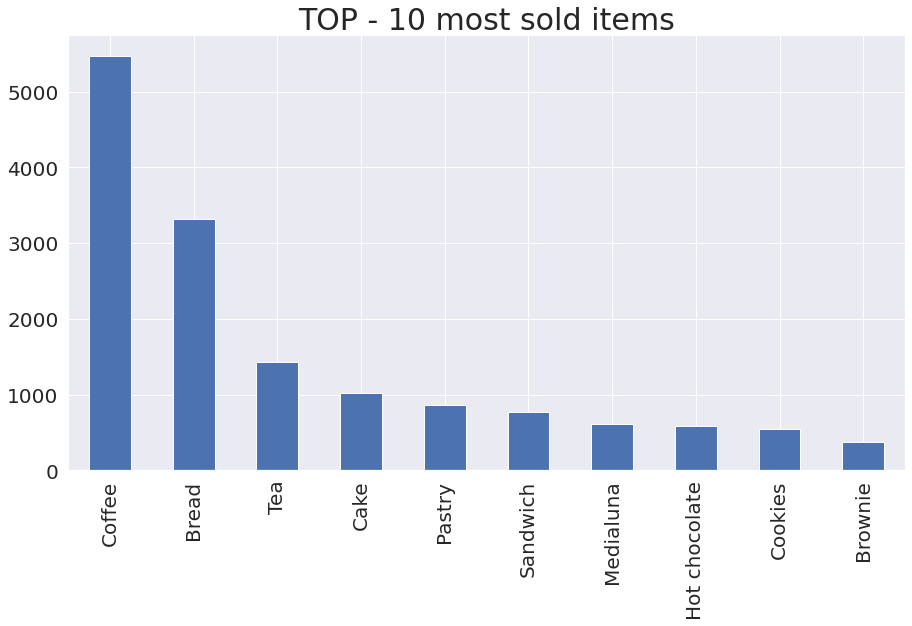

In [19]:
plt.figure(figsize=(15,8))
plt.title("TOP - 10 most sold items", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
most_sold.head(10).plot(kind="bar")

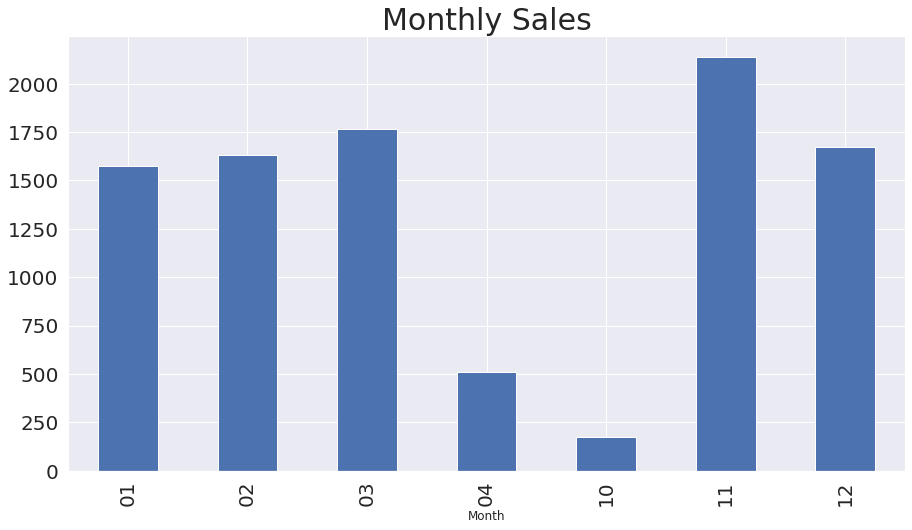

In [20]:
monthly_sales =  updated_data.groupby('Month')['Transaction'].nunique()

plt.figure(figsize=(15,8))
plt.title("Monthly Sales", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
monthly_sales.plot(kind="bar")
plt.show()

In [21]:
tran_list = []

# We will loop through all the unique transactions then append the items of unique transactions into a list

for i in updated_data['Transaction'].unique():
    tlist = list(set(updated_data[updated_data["Transaction"]==i]["Item"]))
    if len(tlist)>0:
        tran_list.append(tlist)

len(tran_list)  

9465

In [22]:
tran_encoder = TransactionEncoder()
te = tran_encoder.fit(tran_list).transform(tran_list)

updated_data = pd.DataFrame(te, columns = tran_encoder.columns_)

In [23]:
frequent_itemsets = apriori(updated_data, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

In [24]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
13,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
15,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
10,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
16,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
9,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
5,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
